# Идентификация личности по манере набора текста.

## Глава 1. Отбор параметров.

### Основные определения.
Внутренним расстоянием будем называть промежуток времени прошедший между нажатием и отпусканием клавиши. Иначе говоря - 
это время в течении котороко клавиша удерживалась нажатой.

Внешним расстоянием будем называть промежуток времени прошедший между отпусканием n-й клавиши и нажатием (n + 1)-й.

Определения математического ожидания и дисперсии можно найти в любом учебнике по теории вероятростей и математической статистике.

### Внутренние расстояния.

Сначала попробуем посмотреть характеризует ли пользователя длительность удержания клавиши нажатой.

In [4]:
from db_provider import Provider

from utils import get_inputs_sequence
import matplotlib.pyplot as plt
%matplotlib inline

provider = Provider("database/research_db.sqlite3")

subjects = provider.get_all_subjects()
inputs_sequence_dict = dict()

for subject in subjects:
    inputs_sequence_dict[subject] = get_inputs_sequence(
        provider.get_all_units_by_subject_id(
            subject
        ), is_raw=True
    )

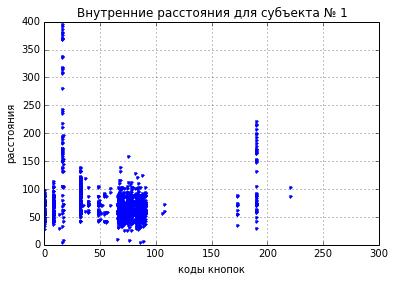

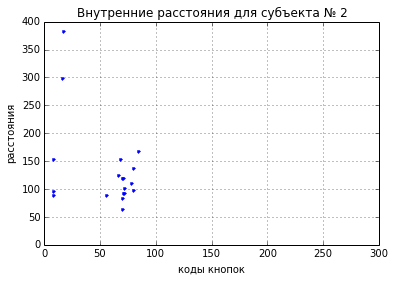

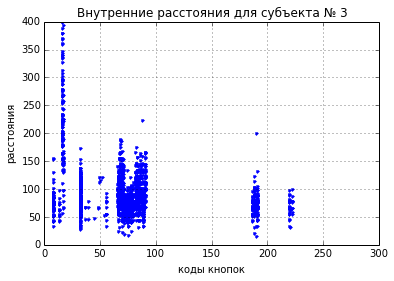

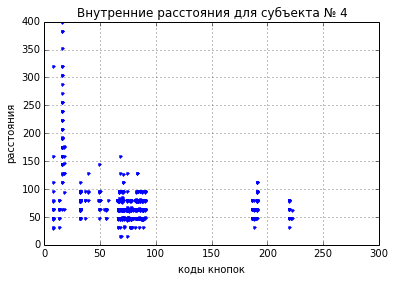

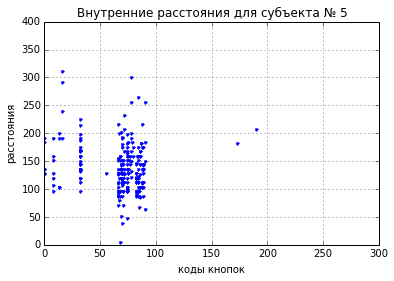

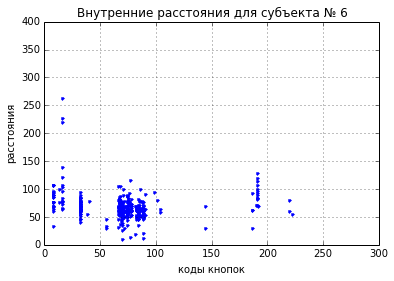

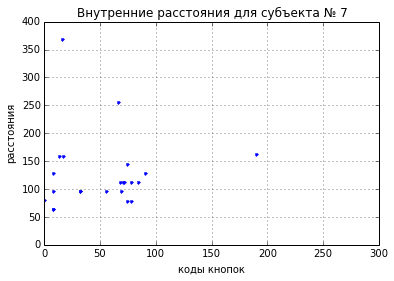

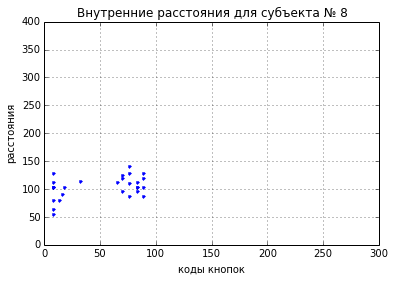

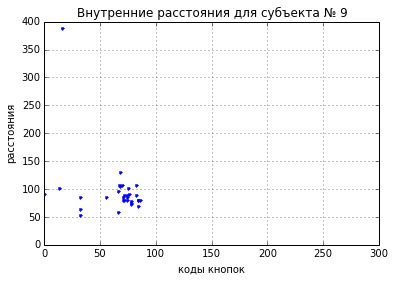

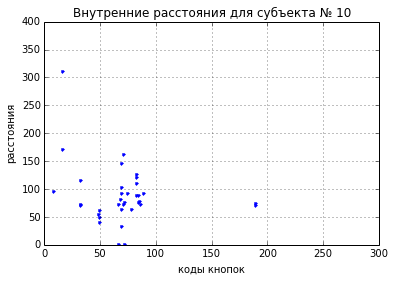

In [5]:

from chapter_one.utils import get_inner_distance_sequence

for subject in subjects:
    ids = get_inner_distance_sequence(
        inputs_sequence_dict[subject]
    )
    x = []
    y = []
    for inner_distance in ids:
        x.append(inner_distance.key_code)
        y.append(inner_distance.distance)
    plt.axis([0,300,0,400])
    plt.plot(x, y, 'b.')
    plt.title("Внутренние расстояния для субъекта № {}".format(subject))
    plt.xlabel("коды кнопок")
    plt.ylabel("расстояния")
    plt.grid(True)
    plt.show()

Теперь рассмотрим как себя ведут математические ожидания.

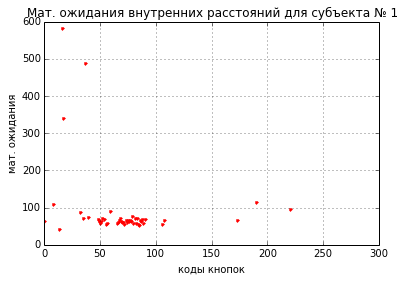

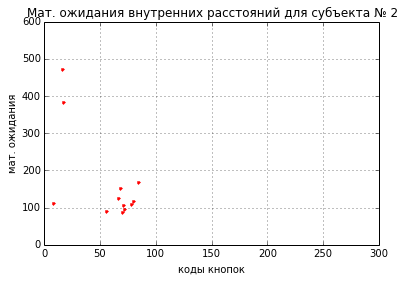

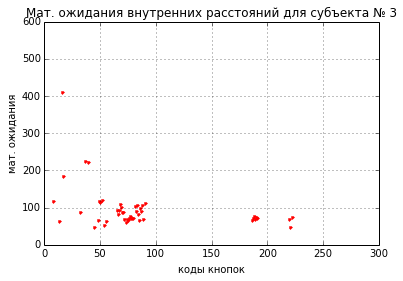

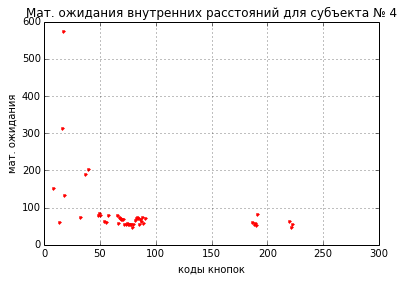

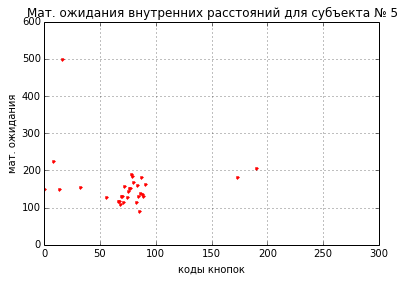

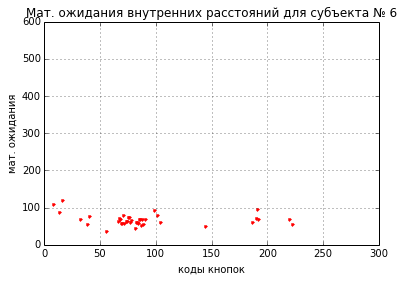

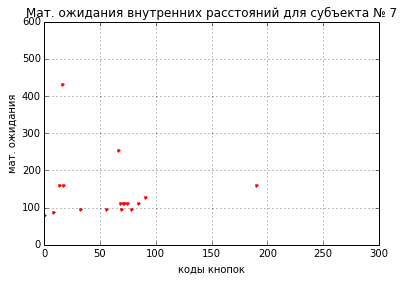

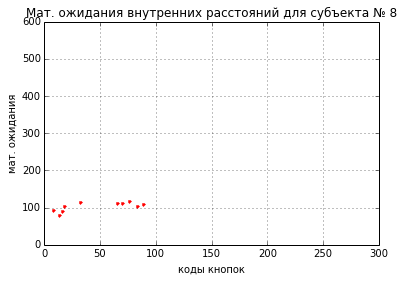

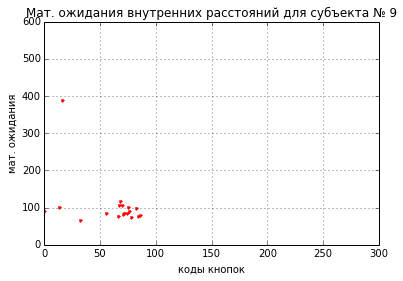

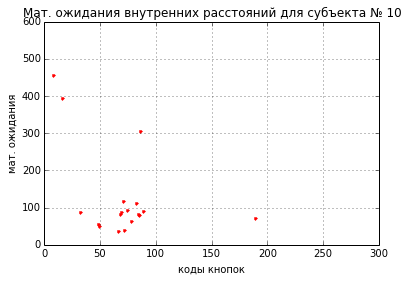

In [6]:
from chapter_one.utils import get_average_inner_distance
average_inner_distance_dict = dict()

for subject in subjects:
    aids = get_average_inner_distance(
        get_inner_distance_sequence(
            inputs_sequence_dict[subject]
        )
    )
    x = []
    y = []
    for aid in aids:
        x.append(aid.key_code)
        y.append(aid.distance)
    plt.plot(x, y, 'r.')
    plt.axis([0,300,0,600])
    plt.title("Мат. ожидания внутренних расстояний для субъекта № {}".format(subject))
    plt.xlabel("коды кнопок")
    plt.ylabel("мат. ожидания")
    plt.grid(True)
    plt.show()
    
    average_inner_distance_dict[subject] = aids

Теперь рассмотрим дисперсии.

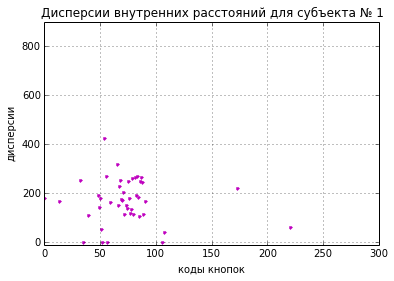

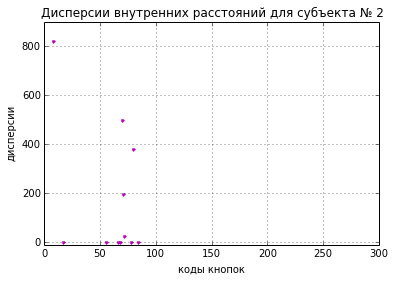

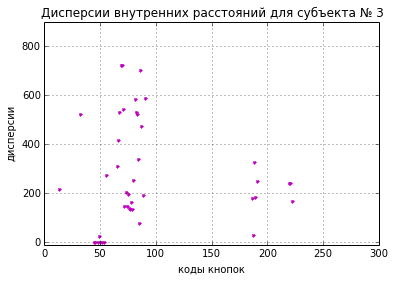

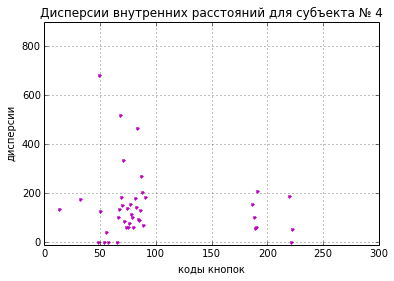

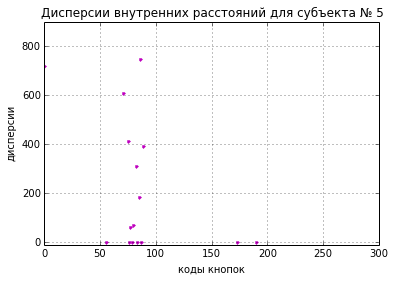

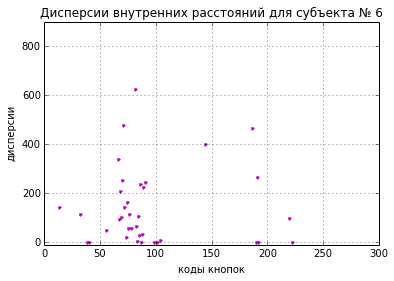

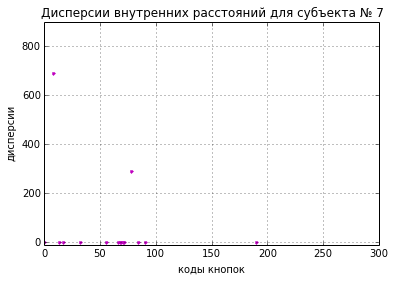

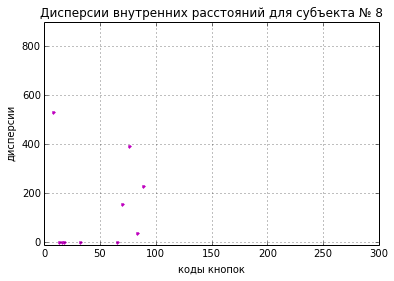

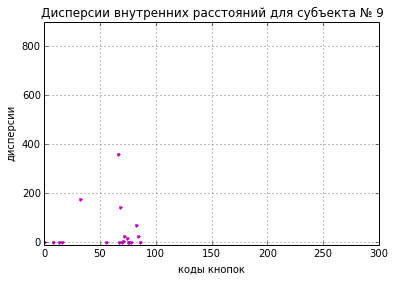

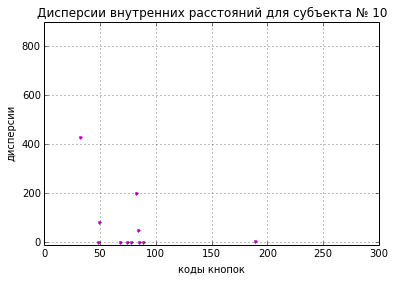

In [7]:
from chapter_one.utils import get_inner_distance_dispersion
inner_distance_dispersion_dict = dict()

for subject in subjects:
    idds = get_inner_distance_dispersion(
        get_inner_distance_sequence(
            inputs_sequence_dict[subject]
        )
    )
    x = []
    y = []
    for idd in idds:
        x.append(idd.key_code)
        y.append(idd.distance)
    plt.plot(x, y, 'm.')
    plt.axis([0,300,-10,900])
    plt.title("Дисперсии внутренних расстояний для субъекта № {}".format(subject))
    plt.xlabel("коды кнопок")
    plt.ylabel("дисперсии")
    plt.grid(True)
    plt.show()
    
    inner_distance_dispersion_dict[subject] = idds

среднеквадратическое отклонение:

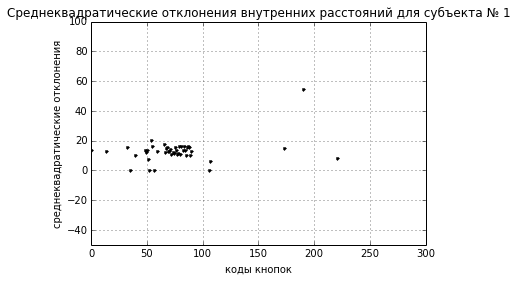

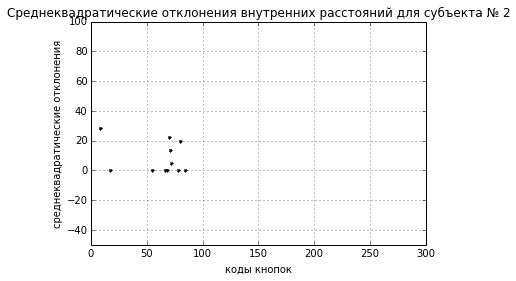

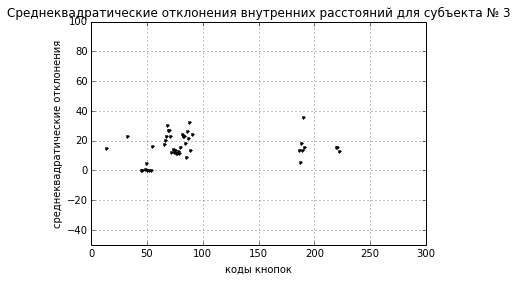

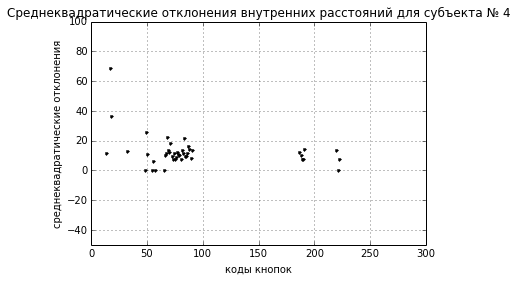

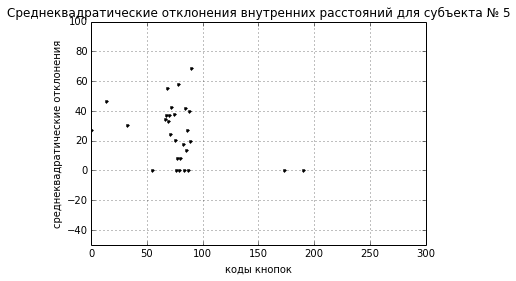

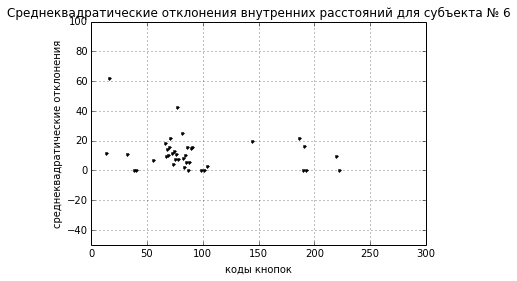

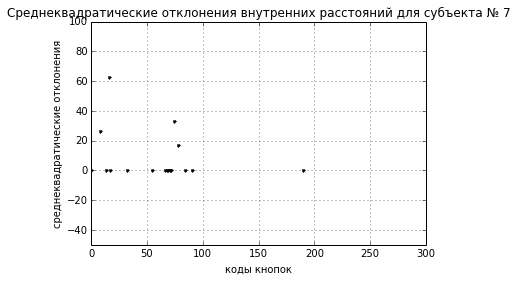

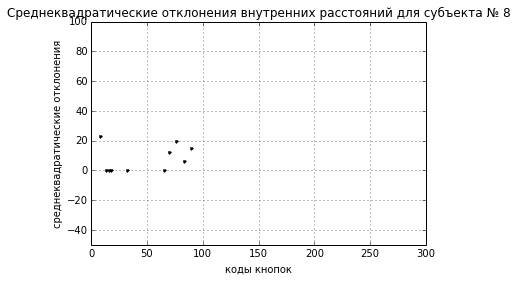

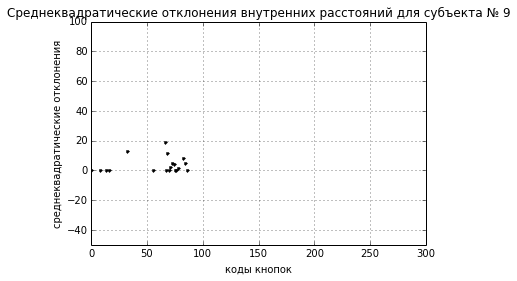

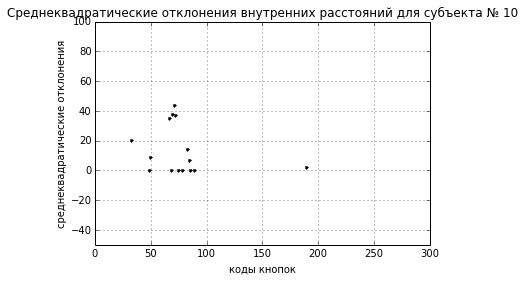

In [8]:
from chapter_one.utils import get_inner_distance_standard_deviation
inner_distance_standard_deviation_dict = dict()

for subject in subjects:
    idsds = get_inner_distance_standard_deviation(
        get_inner_distance_sequence(
            inputs_sequence_dict[subject]
        )
    )
    x = []
    y = []
    for idsd in idsds:
        x.append(idsd.key_code)
        y.append(idsd.distance)
    plt.plot(x, y, 'k.')
    plt.axis([0,300,-50,100])
    plt.title("Среднеквадратические отклонения внутренних расстояний для субъекта № {}".format(subject))
    plt.xlabel("коды кнопок")
    plt.ylabel("среднеквадратические отклонения")
    plt.grid(True)
    plt.show()
    
    inner_distance_standard_deviation_dict[subject] = idsds

Из графиков приведенных выше видно, что для каждого пользователя существуют клавиши для которых дисперсия очень близка к нулю. А это значит, что внутренние расстояния для этих клавиш вполне могут подойти как признаки, по которым можно классифицировать субъект.

### Внешние расстояния.
Рассмотрим как себя ведут внешние расстояния.

In [9]:
from chapter_one.utils import get_outer_distance_sequence

keys_number = 250

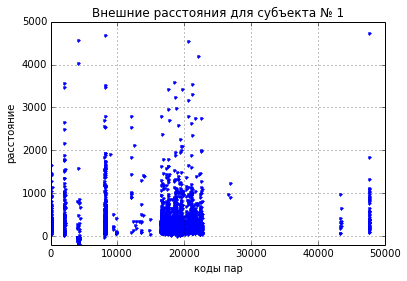

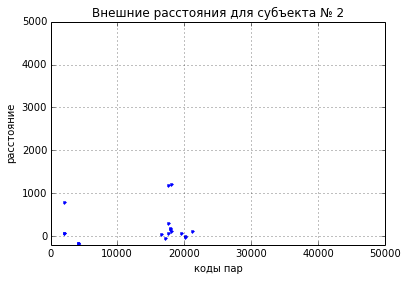

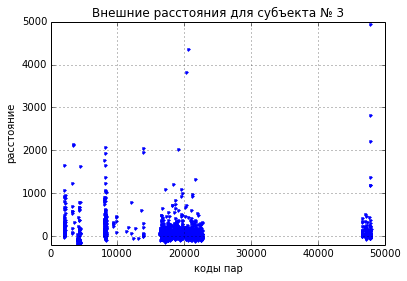

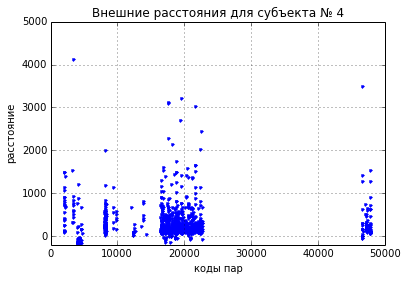

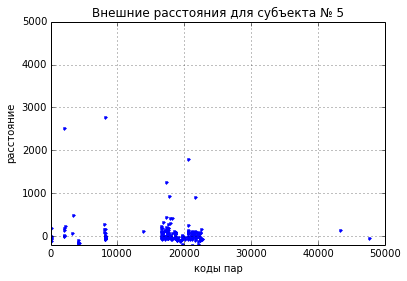

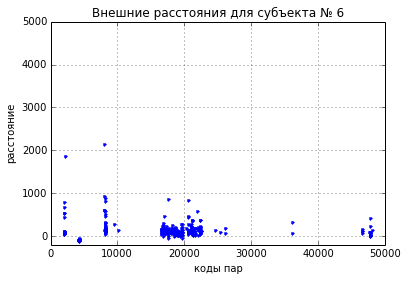

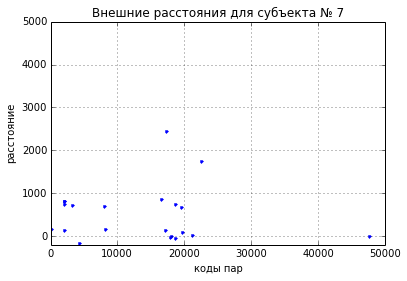

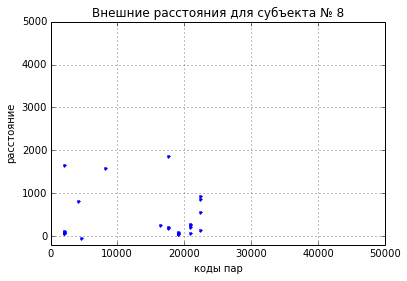

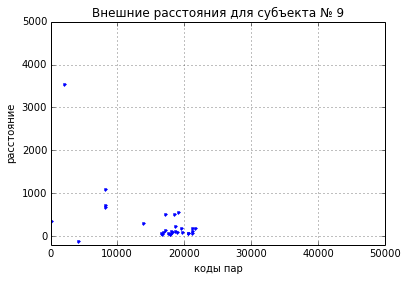

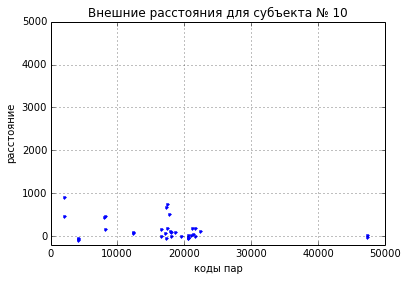

In [10]:
for subject in subjects:
    ods = get_outer_distance_sequence(
        inputs_sequence_dict[subject]
    )
    x = []
    y = []
    for d in ods:
        x.append(d.key_code_from * keys_number + d.key_code_to)
        y.append(d.distance)
    plt.axis([0,50000,-200,5000])
    plt.plot(x, y, 'b.')
    plt.title("Внешние расстояния для субъекта № {}".format(subject))
    plt.xlabel("коды пар")
    plt.ylabel("расстояние")
    plt.grid(True)
    plt.show()

Мат. ожидания:

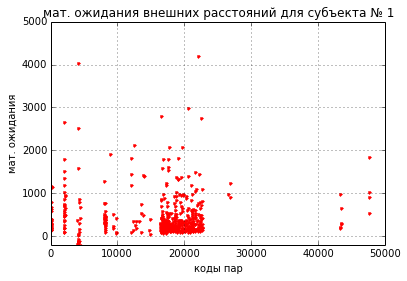

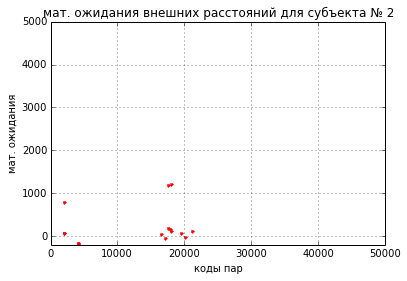

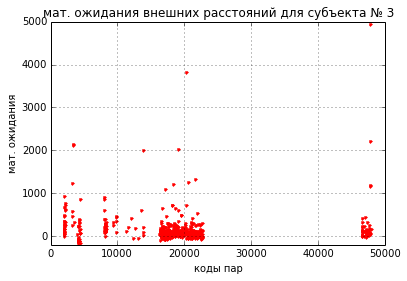

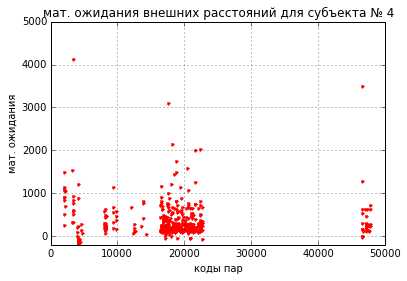

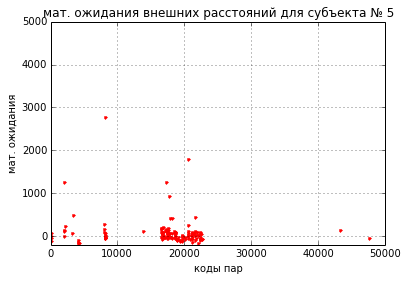

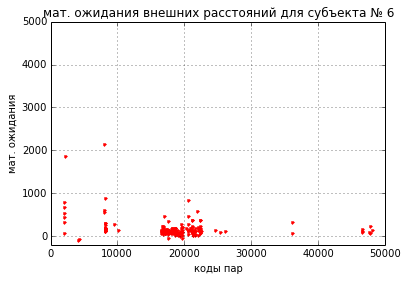

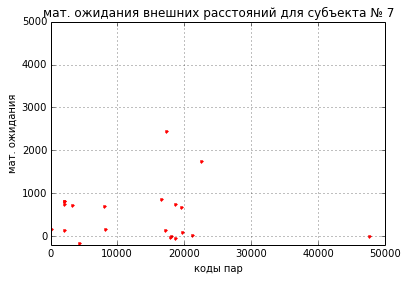

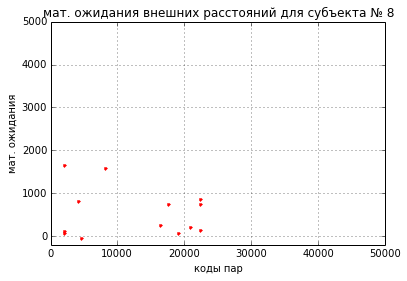

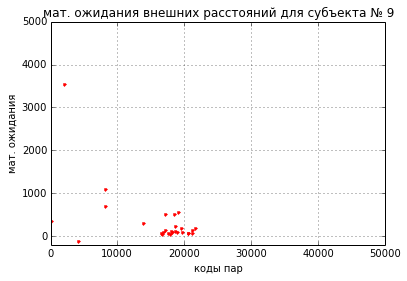

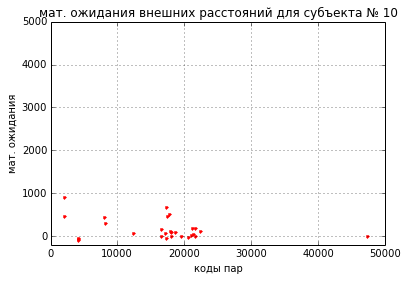

In [11]:
from chapter_one.utils import get_average_outer_distance
average_outer_distance_dict = dict()

for subject in subjects:
    aods = get_average_outer_distance(
        get_outer_distance_sequence(
            inputs_sequence_dict[subject]
        )
    )
    x = []
    y = []
    for ad in aods:
        x.append(ad.key_code_from * keys_number + ad.key_code_to)
        y.append(ad.distance)
    plt.axis([0,50000,-200,5000])
    plt.plot(x, y, 'r.')
    plt.title("мат. ожидания внешних расстояний для субъекта № {}".format(subject))
    plt.xlabel("коды пар")
    plt.ylabel("мат. ожидания")
    plt.grid(True)
    plt.show()
    
    average_outer_distance_dict[subject] = aods

дисперсии:

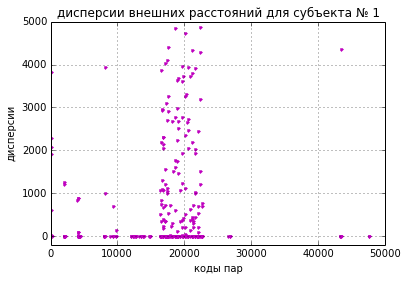

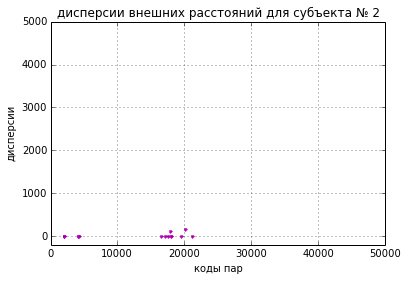

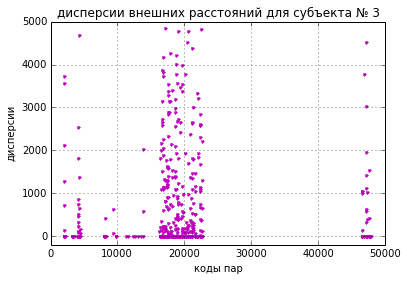

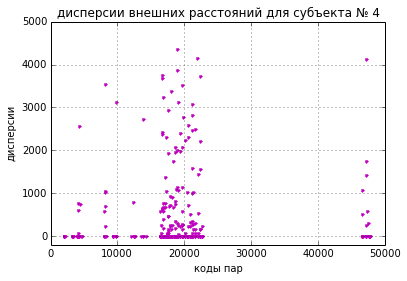

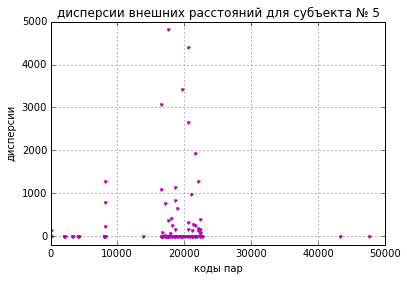

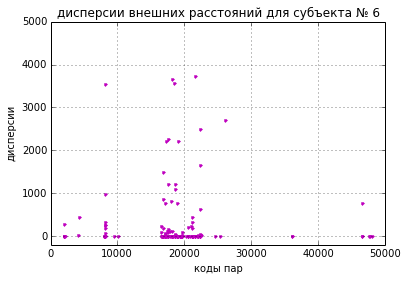

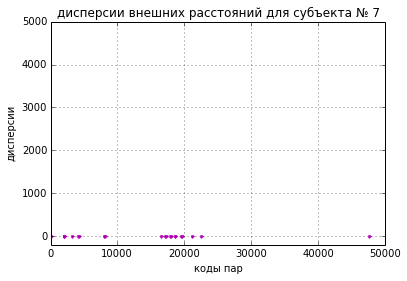

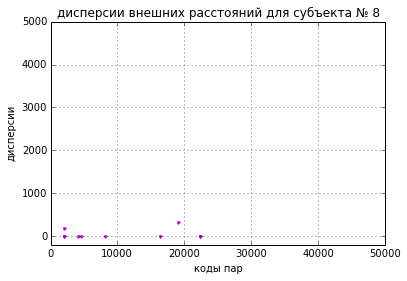

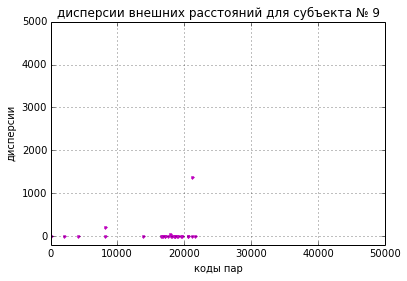

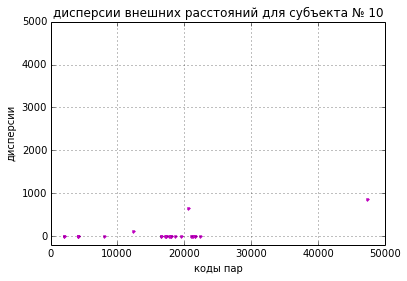

In [12]:
from chapter_one.utils import get_outer_distance_dispersion
outer_distance_dispersion_dict = dict()

for subject in subjects:
    odds = get_outer_distance_dispersion(
        get_outer_distance_sequence(
            inputs_sequence_dict[subject]
        )
    )
    x = []
    y = []
    for odd in odds:
        x.append(odd.key_code_from * keys_number + odd.key_code_to)
        y.append(odd.distance)
    plt.axis([0,50000,-200,5000])
    plt.plot(x, y, 'm.')
    plt.title("дисперсии внешних расстояний для субъекта № {}".format(subject))
    plt.xlabel("коды пар")
    plt.ylabel("дисперсии")
    plt.grid(True)
    plt.show()
    
    outer_distance_dispersion_dict[subject] = odds

среднеквадратическое отклонение: 

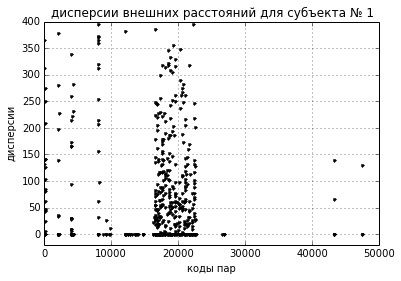

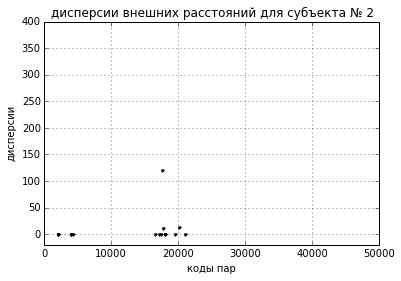

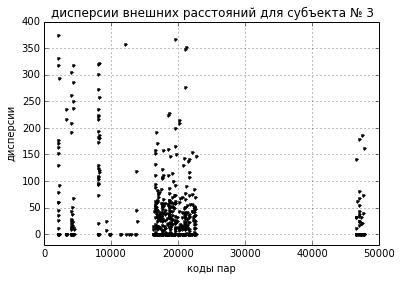

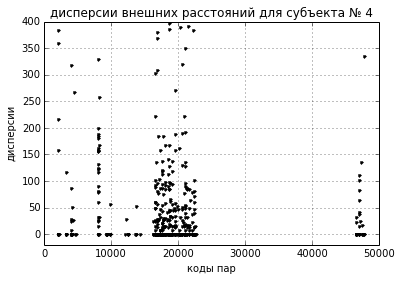

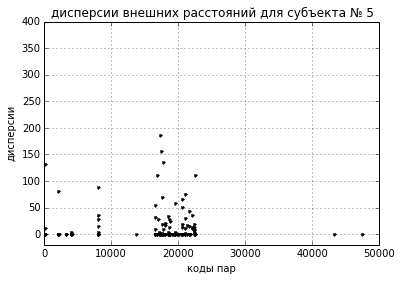

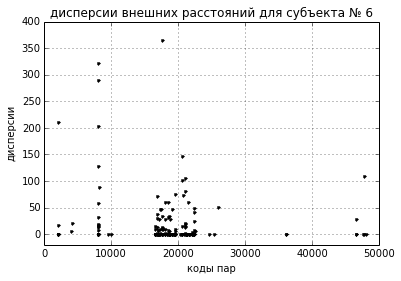

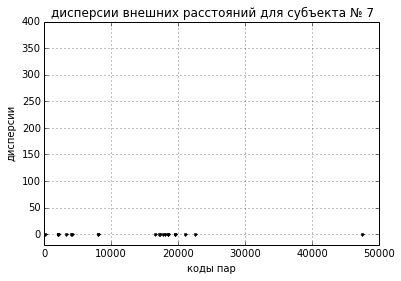

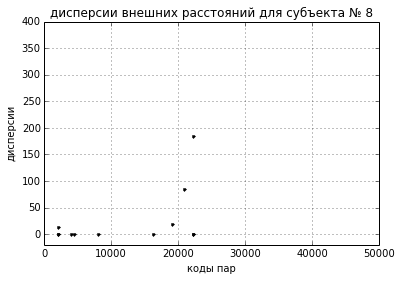

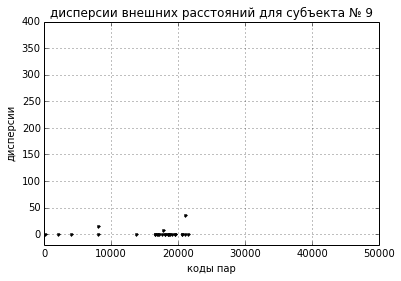

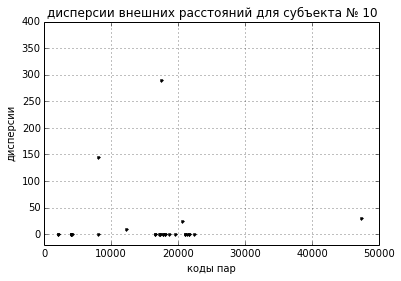

In [13]:
from chapter_one.utils import get_outer_distance_standard_deviation
outer_distance_standard_deviation_dict = dict()

for subject in subjects:
    odsds = get_outer_distance_standard_deviation(
        get_outer_distance_sequence(
            inputs_sequence_dict[subject]
        )
    )
    x = []
    y = []
    for odsd in odsds:
        x.append(odsd.key_code_from * keys_number + odsd.key_code_to)
        y.append(odsd.distance)
    plt.axis([0,50000,-20,400])
    plt.plot(x, y, 'k.')
    plt.title("дисперсии внешних расстояний для субъекта № {}".format(subject))
    plt.xlabel("коды пар")
    plt.ylabel("дисперсии")
    plt.grid(True)
    plt.show()
    
    outer_distance_standard_deviation_dict[subject] = odsds

В случае внешних расстояний, клавишь для которых дисперсии равны нулю стало еще больше.

### Математическое ожидание, дисперсия и среднеквадратическое отклонение для наиболее часто используемых клавишь.
Теперь рассмотрим частоты нажатий клавишь и другие параметры для внутренних расстояний.

In [14]:
frequency_taps = dict()              # общие частоты нажатий клавишь {{key:frequency}}
for subject in subjects:
    for input_item in  inputs_sequence_dict[subject]:
        if input_item.key_code in frequency_taps.keys():
            frequency_taps[input_item.key_code] += 1
        else:
            frequency_taps[input_item.key_code] = 1

taps_count = float( sum( frequency_taps.values() ) )
for key_code in frequency_taps.keys():
    frequency_taps[key_code] = float(frequency_taps[key_code])/taps_count

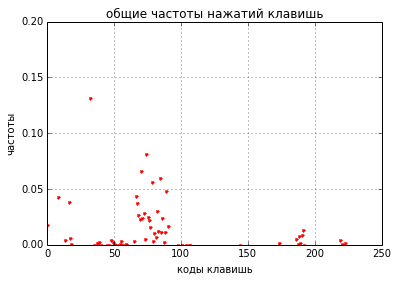

In [15]:
plt.plot(list(frequency_taps.keys()), list(frequency_taps.values()), 'r.')
plt.title('общие частоты нажатий клавишь')
plt.axis([0,250,0,0.2])
plt.xlabel('коды клавишь')
plt.ylabel('частоты')
plt.grid(True)
plt.show()

In [16]:
frequency_taps_for_subjects = dict() # частоты нажатий клавишь для каждого субъекта {subj:{key:frequency}}
for subject in subjects:
    frequency_taps_for_subjects[subject] = dict()
    for input_item in  inputs_sequence_dict[subject]:
        if input_item.key_code in frequency_taps_for_subjects[subject].keys():
            frequency_taps_for_subjects[subject][input_item.key_code] += 1
        else:
            frequency_taps_for_subjects[subject][input_item.key_code] = 1

for subject in subjects:
    taps_count = float(len(inputs_sequence_dict[subject]))
    for key_code in frequency_taps_for_subjects[subject]:
        frequency_taps_for_subjects[subject][key_code] = float(frequency_taps_for_subjects[subject][key_code])/taps_count

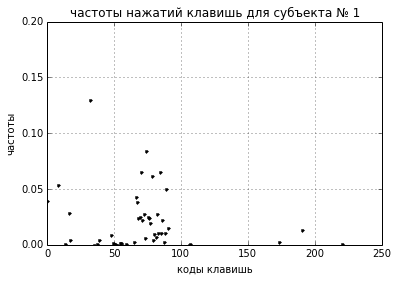

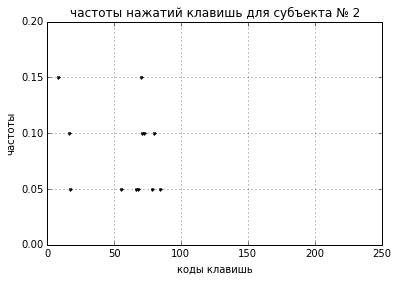

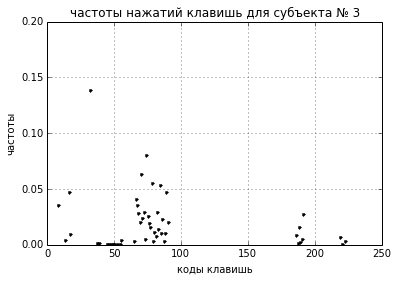

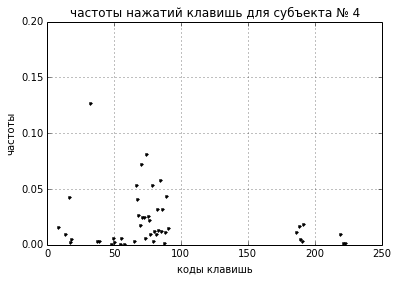

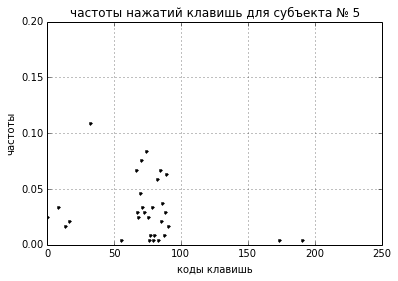

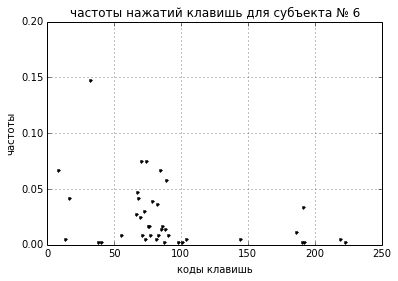

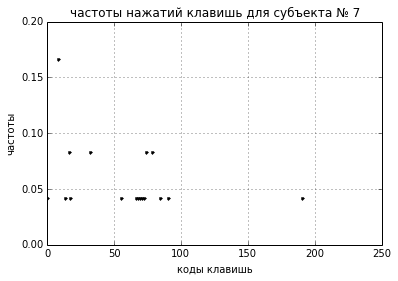

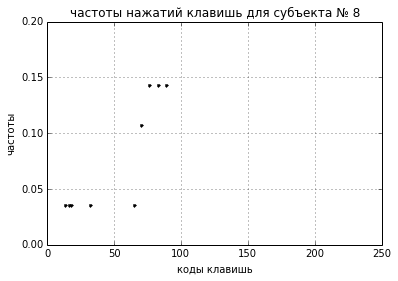

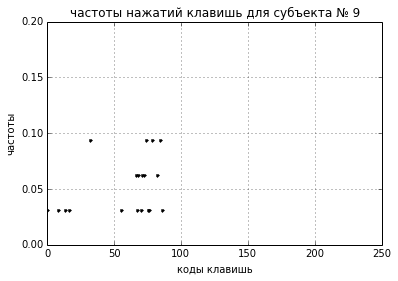

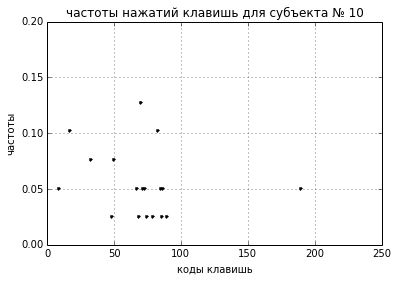

In [17]:
for subject in subjects:
    for key_code in frequency_taps_for_subjects[subject].keys():
        plt.plot(key_code, frequency_taps_for_subjects[subject][key_code], 'k.')
    plt.title('частоты нажатий клавишь для субъекта № {0}'.format(subject))
    plt.xlabel('коды клавишь')
    plt.ylabel('частоты')
    plt.axis([0,250,0,0.2])
    plt.grid(True)
    plt.show()

Попробуем отобрать по 15 наиболее часто используемых клавиш для каждого пользователя и посмотреть как организовано это множество.

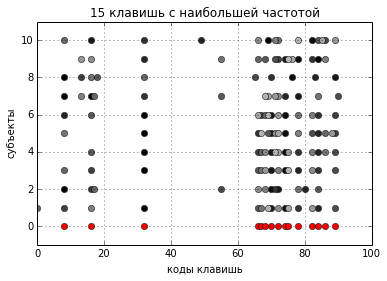

In [18]:
most_popular_keys = sorted(frequency_taps, key=lambda k: frequency_taps[k])[-1:-16:-1]

for subject in subjects:
    keys = sorted(frequency_taps_for_subjects[subject], key=lambda k: frequency_taps_for_subjects[subject][k])[-1:-16:-1]
    i=0
    for key in keys:
        plt.plot(key, subject, marker='o', color=str(i))
        i+=0.05
plt.plot(most_popular_keys, [0]*15, 'ro')
plt.title('15 клавишь с наибольшей частотой')
plt.xlabel("коды клавишь")
plt.ylabel("субъекты")
plt.axis([0,100,-1,11])
plt.grid(True)
plt.show()
#более темные точки соответствуют клавишам с большей частотой
#красными точками отмечены клавиши с наибольшими частотами для всех пользователей

In [19]:
most_active_subjects=[1,3,4,5,6]
p_settings = {
    1: 'k.',
    3: 'b.',
    4: 'r.',
    5: 'g.',
    6: 'y.',
}

Отложим на графиках мат. ожидания, дисперсии и ср.-кв. отклонения для 15-ти наиболее часто используемых клавишь и для наиболее активных пользователей.

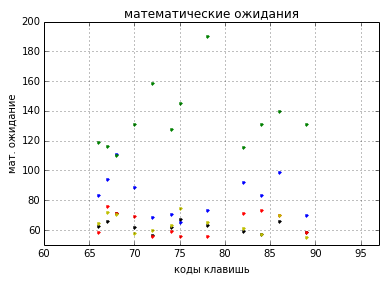

In [20]:
for subject in most_active_subjects:
    aid = list([(in_d.distance, in_d.key_code) for in_d in average_inner_distance_dict[subject] if in_d.key_code in most_popular_keys])
    plt.plot(list([_id[1] for _id in aid]), list([_id[0] for _id in aid]), p_settings[subject])
plt.axis([60,97,50,200])
plt.grid(True)
plt.title('математические ожидания')
plt.xlabel("коды клавишь")
plt.ylabel("мат. ожидание")
plt.show()

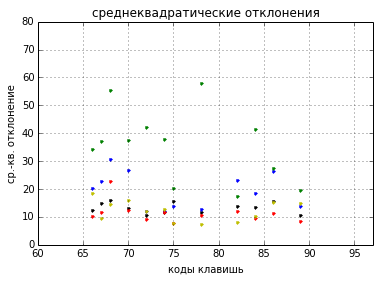

In [21]:
for subject in most_active_subjects:
    idsd = list([(in_d.distance, in_d.key_code) for in_d in inner_distance_standard_deviation_dict[subject] if in_d.key_code in most_popular_keys])
    plt.plot(list([_id[1] for _id in idsd]), list([_id[0] for _id in idsd]), p_settings[subject])
plt.grid(True)
plt.axis([60,97,0,80])
plt.title('среднеквадратические отклонения')
plt.xlabel("коды клавишь")
plt.ylabel("ср.-кв. отклонение")
plt.show()

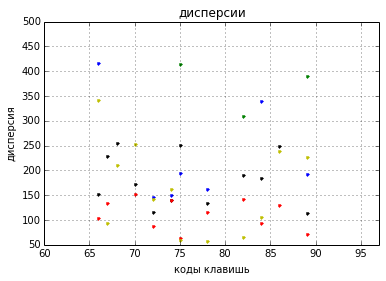

In [22]:
for subject in most_active_subjects:
    idd = list([(in_d.distance, in_d.key_code) for in_d in inner_distance_dispersion_dict[subject] if in_d.key_code in most_popular_keys])
    plt.plot(list([_id[1] for _id in idd]), list([_id[0] for _id in idd]), p_settings[subject])
plt.grid(True)
plt.axis([60,97,50,500])
plt.title('дисперсии')
plt.xlabel("коды клавишь")
plt.ylabel("дисперсия")
plt.show()

Рассмотрим все те же параметры для внешних расстояний.

In [23]:
frequency_sharing = dict()
for subject in subjects:
    for outer_dist in get_outer_distance_sequence(inputs_sequence_dict[subject]):
        id_od = outer_dist.key_code_from * keys_number + outer_dist.key_code_to
        if id_od in frequency_sharing.keys():
            frequency_sharing[id_od] += 1
        else:
            frequency_sharing[id_od] = 1
sharding_count = float(sum(frequency_sharing.values()))
for key in frequency_sharing.keys():
    frequency_sharing[key] = float(frequency_sharing[key])/sharding_count

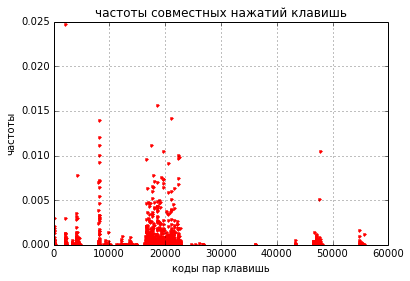

In [24]:
plt.plot(list(frequency_sharing.keys()), list(frequency_sharing.values()), 'r.')
plt.title("частоты совместных нажатий клавишь")
plt.xlabel('коды пар клавишь')
plt.ylabel('частоты')
plt.grid(True)
plt.show()

In [25]:
frequency_sharing_for_subjects = dict()
for subject in subjects:
    frequency_sharing_for_subjects[subject] = dict()
    for outer_dist in get_outer_distance_sequence(inputs_sequence_dict[subject]):
        id_od = outer_dist.key_code_from * keys_number + outer_dist.key_code_to
        if id_od in frequency_sharing_for_subjects[subject].keys():
            frequency_sharing_for_subjects[subject][id_od] += 1
        else:
            frequency_sharing_for_subjects[subject][id_od] = 1
    sharding_count = float(sum(frequency_sharing_for_subjects[subject].values()))
    for key in frequency_sharing_for_subjects[subject].keys():
        frequency_sharing_for_subjects[subject][key] = float(frequency_sharing_for_subjects[subject][key])/sharding_count

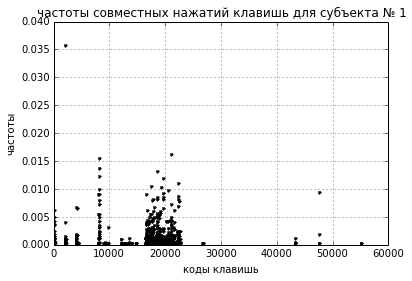

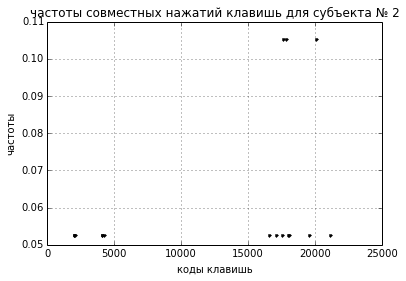

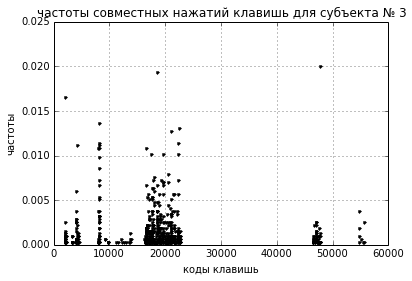

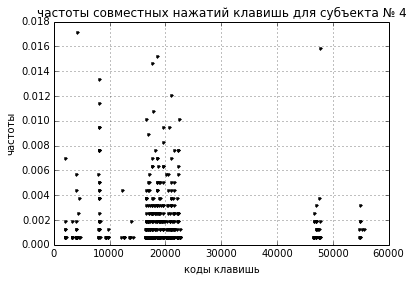

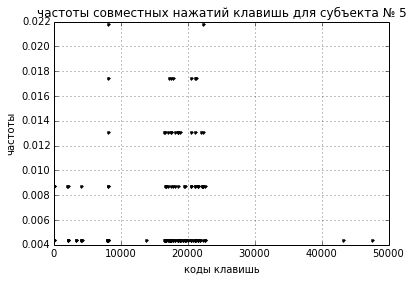

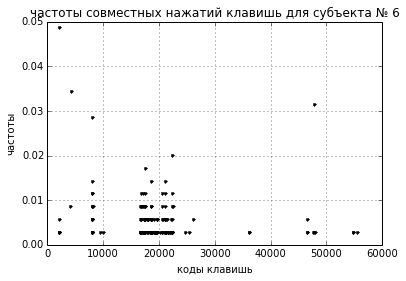

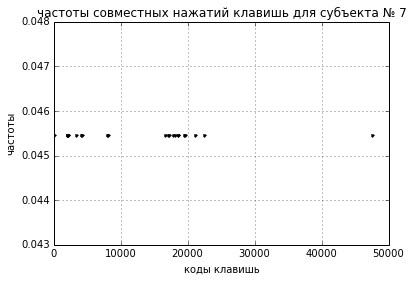

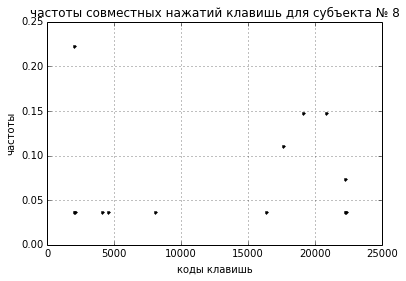

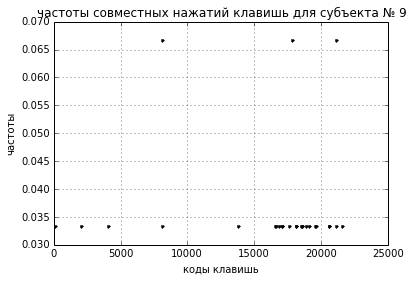

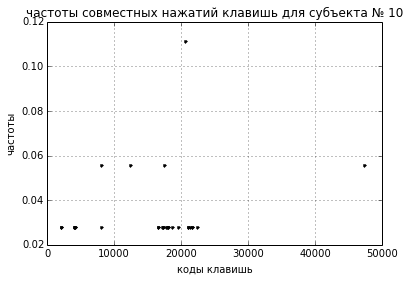

In [26]:
for subject in subjects:
    plt.plot(
        list(frequency_sharing_for_subjects[subject].keys()),
        list(frequency_sharing_for_subjects[subject].values()),
        'k.'
    )
    plt.title('частоты совместных нажатий клавишь для субъекта № {0}'.format(subject))
    plt.grid(True)
    plt.xlabel('коды клавишь')
    plt.ylabel('частоты')
    plt.show()

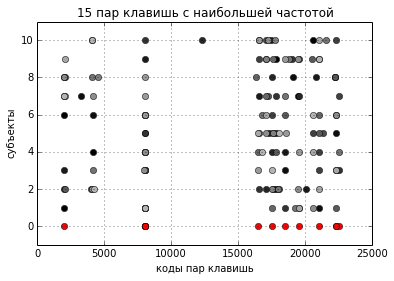

In [27]:
most_popular_sharding = sorted(frequency_sharing, key=lambda k: frequency_sharing[k])[-1:-16:-1]
for subject in subjects:
    keys = sorted(frequency_sharing_for_subjects[subject], key=lambda k: frequency_sharing_for_subjects[subject][k])[-1:-16:-1]
    i=0
    for key in keys:
        plt.plot(key, subject, marker='o', color=str(i))
        i+=0.05
plt.plot(most_popular_sharding, [0]*15, 'ro')
plt.title('15 пар клавишь с наибольшей частотой')
plt.xlabel("коды пар клавишь")
plt.ylabel("субъекты")
plt.axis([0,25000,-1,11])
plt.grid(True)
plt.show()
#более темные точки соответствуют парам клавишь с большей частотой
#красными точками отмечены пары клавишь с наибольшими частотами для всех пользователей

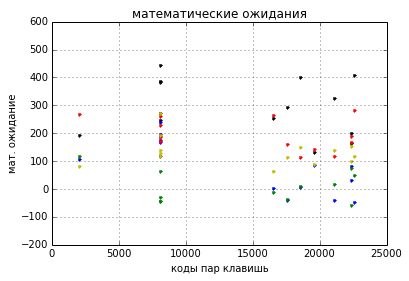

In [28]:
for subject in most_active_subjects:
    aod = list([(ot_d.distance, ot_d.key_code_from * keys_number + ot_d.key_code_to) for ot_d in average_outer_distance_dict[subject] if ot_d.key_code_from * keys_number + ot_d.key_code_to  in most_popular_sharding])
    plt.plot(list([_od[1] for _od in aod]), list([_od[0] for _od in aod]), p_settings[subject])
plt.axis([0,25000,-200,600])
plt.grid(True)
plt.title('математические ожидания')
plt.xlabel("коды пар клавишь")
plt.ylabel("мат. ожидание")
plt.show()

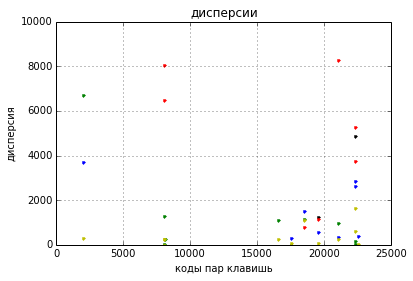

In [29]:
for subject in most_active_subjects:
    odd = list([(ot_d.distance, ot_d.key_code_from * keys_number + ot_d.key_code_to) for ot_d in outer_distance_dispersion_dict[subject] if ot_d.key_code_from * keys_number + ot_d.key_code_to  in most_popular_sharding])
    plt.plot(list([_od[1] for _od in odd]), list([_od[0] for _od in odd]), p_settings[subject])
plt.axis([0,25000,0,10000])
plt.grid(True)
plt.title('дисперсии')
plt.xlabel("коды пар клавишь")
plt.ylabel("дисперсия")
plt.show()

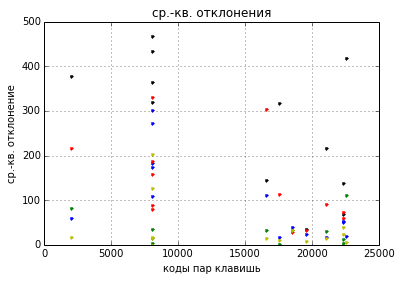

In [30]:
for subject in most_active_subjects:
    odsd = list([(ot_d.distance, ot_d.key_code_from * keys_number + ot_d.key_code_to) for ot_d in outer_distance_standard_deviation_dict[subject] if ot_d.key_code_from * keys_number + ot_d.key_code_to  in most_popular_sharding])
    plt.plot(list([_od[1] for _od in odsd]), list([_od[0] for _od in odsd]), p_settings[subject])
plt.axis([0,25000,0,500])
plt.grid(True)
plt.title('ср.-кв. отклонения')
plt.xlabel("коды пар клавишь")
plt.ylabel("ср.-кв. отклонение")
plt.show()

### Pandas.
Рассмотрим как распределены частоты нажатия клавишь у различных субъектов. Для этого отсортируем коды клавишь по частотам их использования и выведем в виде таблицы.

In [31]:
import pandas as pd

sorted_frequencys_of_taps = dict()
max_len = max([len(item) for item in frequency_taps_for_subjects.values()])
for subject in subjects:
    sorted_frequencys_of_taps[subject] = sorted(frequency_taps_for_subjects[subject], key=lambda k: frequency_taps_for_subjects[subject][k], reverse=True)
    sorted_frequencys_of_taps[subject] = sorted_frequencys_of_taps[subject] + [0]*(max_len - len(sorted_frequencys_of_taps[subject]))

frequencys_of_taps = pd.DataFrame(sorted_frequencys_of_taps)
frequencys_of_taps

,1,2,3,4,5,6,7,8,9,10
0,32,70,32,32,32,32,8,8,32,69
1,74,8,74,74,74,70,32,83,74,16
2,70,16,70,70,70,74,74,89,78,82
3,84,71,78,84,66,84,78,76,84,32
4,78,80,84,66,84,8,16,70,66,49
5,8,72,16,78,89,89,0,16,68,66
6,89,66,89,89,82,67,66,32,71,71
7,66,68,66,16,69,68,68,18,72,72
8,0,78,8,67,86,16,69,65,82,8
9,67,17,67,82,71,78,71,13,0,84


Теперь рассмотрим как распределены частоты совместных использований клавишь.

In [32]:
sorted_frequencys_of_sharing = dict()
max_len = max([len(item) for item in frequency_sharing_for_subjects.values()])
for subject in subjects:
    sorted_frequencys_of_sharing[subject] = sorted(frequency_sharing_for_subjects[subject], key=lambda k: frequency_sharing_for_subjects[subject][k], reverse=True)
    sorted_frequencys_of_sharing[subject] = sorted_frequencys_of_sharing[subject] + [0]*(max_len - len(sorted_frequencys_of_sharing[subject]))

frequencys_of_sharing = pd.DataFrame(sorted_frequencys_of_sharing)
frequencys_of_sharing

,1,2,3,4,5,6,7,8,9,10
0,2008,20070,47782,4191,22334,2008,8000,2008,8071,20569
1,21032,17580,18532,47782,8089,4191,18569,20839,21078,8086
2,8089,17822,2008,18532,17582,47782,4055,19083,17822,12299
3,8067,2016,8089,17532,21032,8089,78,17576,16834,17439
4,18532,4258,22532,8067,21324,22324,18066,22258,13763,47332
5,8071,21078,21032,21032,20570,17532,21078,8065,18500,17282
6,19574,4071,22324,8078,8082,21032,2071,2018,74,21574
7,22320,19516,8071,17824,17282,18532,2008,4516,8075,21319
8,17532,17517,4191,22532,17822,8078,2074,4070,16578,8008
9,19282,18008,8078,16532,17500,17582,8090,16326,18576,19532
